In [501]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

math = pd.read_csv('stud_math.csv')

In [502]:
# FUNCTIONS
# выводит все нечисловые строки
def get_vcounts(df):
    for x in range(len(df.columns)):
        if df[df.columns[x]].dtype == 'O':
            print(pd.DataFrame(df[df.columns[x]].value_counts()), '\n')

# выводим гистограммы всех числовых признаков ( для первичной оценки)


def get_hists(df):
    for x in range(len(df.columns)):
        if df[df.columns[x]].dtype != 'O':
            print(df[df.columns[x]].describe())
            fig = plt.figure()
            axes = fig.add_axes([0, 0, 1, 1])
            axes.hist(df[df.columns[x]])
            axes.set_title(df.columns[x])

# чистим числовые данные от выбросов. список серий задается в ручную
# выбросами считаем все, что не попадает в промежуток  25%-IQR*1.5 <= data <= 75%+IQR*1.5 (box+whiskers)


def clean_data(df, sers):
    for i in range(len(sers)):
        IQR = df[sers[i]].quantile(0.75) - df[sers[i]].quantile(0.25)
        perc25 = df[sers[i]].quantile(0.25)
        perc75 = df[sers[i]].quantile(0.75)

        df = df[sers[i]].loc[df[sers[i]].between(
            perc25 - 1.5*IQR,
            perc75 + 1.5*IQR)]

        global math
        math[sers[i]] = df  # сохраняем очищенные данные в DF

# строим бокс плот рейтинга по колонке/ колонкам при Y: score


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.boxplot(x=column, y='score',
                data=math.loc[math.loc[:, column].isin(
                    math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# Тест Стьюдента для поиска статистически значимых колонок
def get_stat_dif(df, column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        # print(column , comb , ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
        #                df.loc[df.loc[:, column] == comb[1], 'score']) , len(combinations_all))
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score'], equal_var=False).pvalue \
                <= 0.2/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


# переводим условно числовые признаки в категориальные
def change_type(df, cols):
    for i in range(len(cols)):
        df[cols[i]] = df[cols[i]].astype('str')
    global data
    data = df

In [503]:
# датасет-черновик для эксперементов
data = math
# data.head(1)
# data.info()

In [504]:
display(math.head(20))
math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [505]:
math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'meduc', 'feduc', 'mjob', 'fjob', 'reason', 'guardian', 'travelt', 'studyt', 'failures',
                'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'gstudytime', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']
math.head(1)

,school,sex,age,address,famsize,pstatus,meduc,feduc,mjob,fjob,reason,guardian,travelt,studyt,failures,schoolsup,famsup,paid,activities,nursery,gstudytime,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0


In [506]:
# проверяем все нечисловые серии на выбросы значений ( не NaN и не один из возможных)
get_vcounts(math)

    school
GP     349
MS      46 

   sex
F  208
M  187 

   address
U      295
R       83 

     famsize
GT3      261
LE3      107 

   pstatus
T      314
A       36 

          mjob
other      133
services    98
at_home     58
teacher     55
health      32 

          fjob
other      197
services   102
teacher     29
at_home     16
health      15 

            reason
course         137
home           104
reputation     103
other           34 

        guardian
mother       250
father        86
other         28 

     schoolsup
no         335
yes         51 

     famsup
yes     219
no      137 

     paid
no    200
yes   155 

     activities
yes         195
no          186 

     nursery
yes      300
no        79 

     higher
yes     356
no       19 

     internet
yes       305
no         56 

     romantic
no        240
yes       124 



count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: meduc, dtype: float64
count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: feduc, dtype: float64
count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: travelt, dtype: float64
count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studyt, dtype: float64
count    373.000000
mean       0.337802
std        0.743135

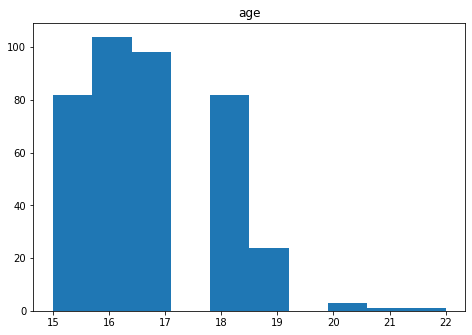

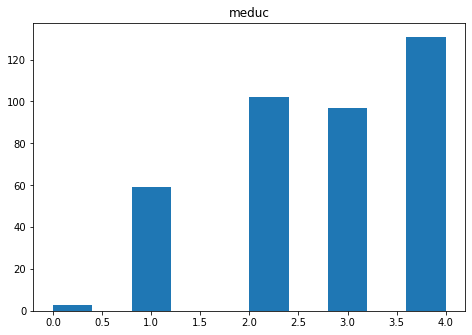

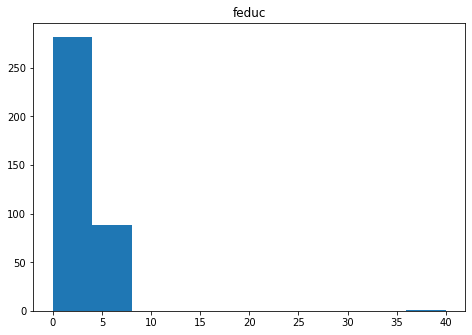

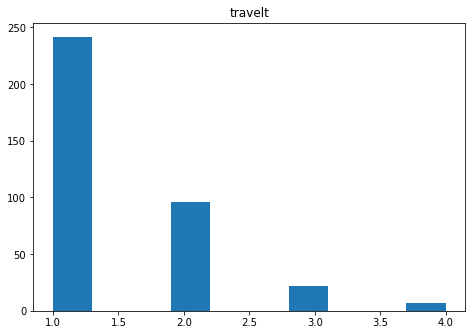

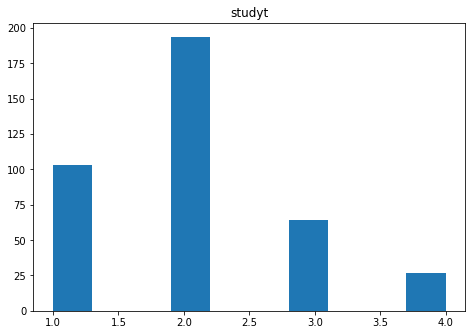

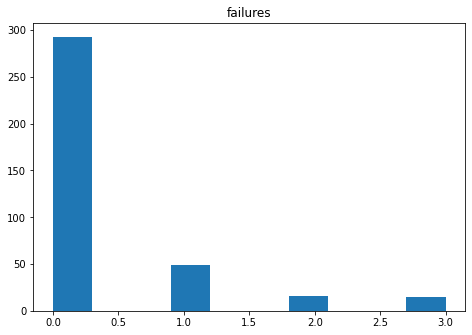

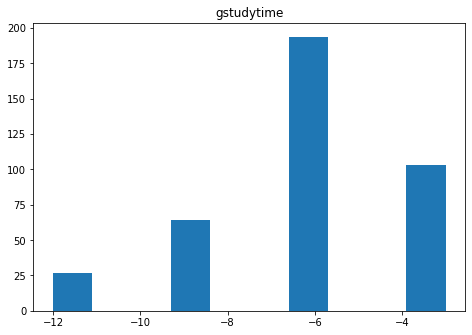

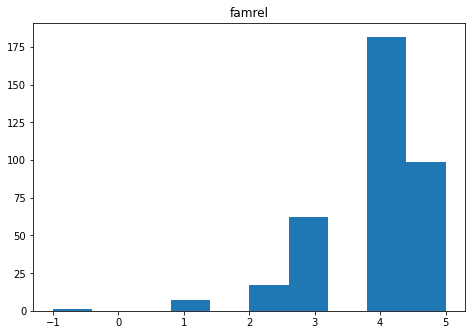

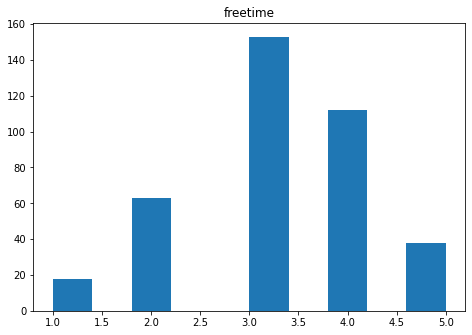

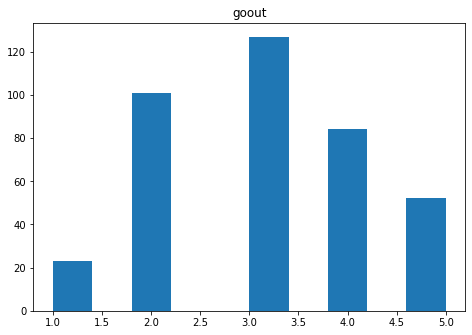

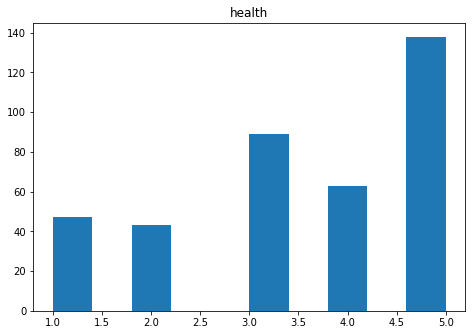

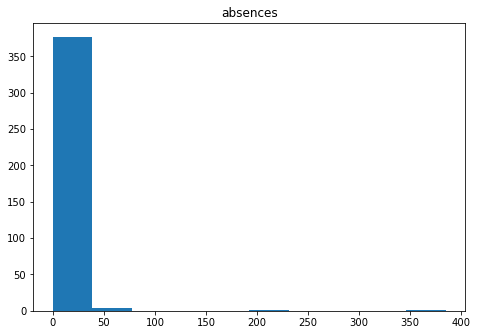

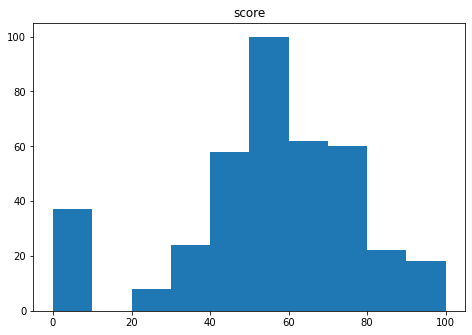

In [508]:
# выводим все гистограммы и стат. описания для первичной оценки всех числовых данных
# из полученных данных делаем вывод: в feduc , famrel , absences есть ошибки

get_hists(math)

In [509]:
# теперь чистим данные
# из числовых серий берем только значения внутри границы выбросов
# у нас есть функия clean_data , но сейчас мы убираем ошибки по условию т.к. данные нам числовые данные в feduc, famrel условно числовые
# удаляем данные противоречящие условиям

math = math.loc[math.feduc <= 4]
math = math.loc[(math.famrel <= 5) & (math.famrel >= 1)]

count    345.000000
mean      16.718841
std        1.282403
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
count    342.000000
mean       2.739766
std        1.101637
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: meduc, dtype: float64
count    345.000000
mean       2.521739
std        1.091839
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: feduc, dtype: float64
count    322.000000
mean       1.456522
std        0.701337
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: travelt, dtype: float64
count    338.000000
mean       2.029586
std        0.843379
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studyt, dtype: float64
count    326.000000
mean       0.334356
std        0.753566

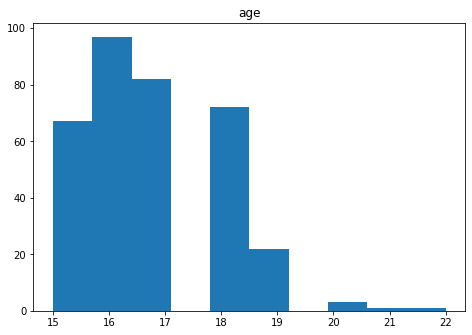

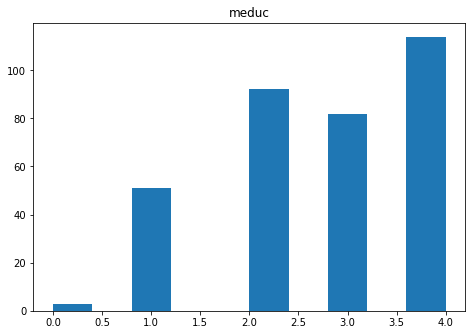

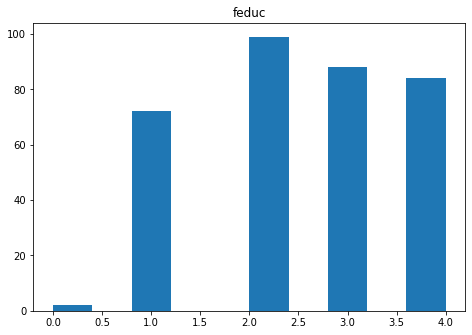

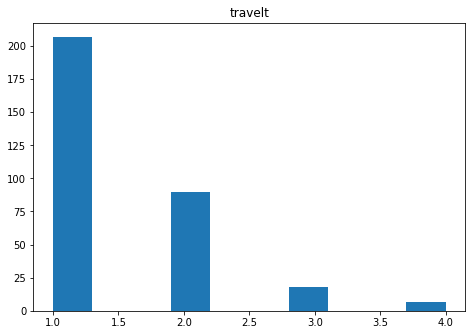

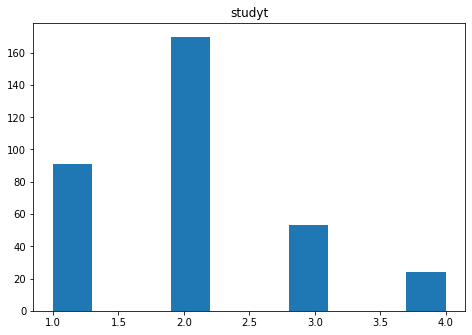

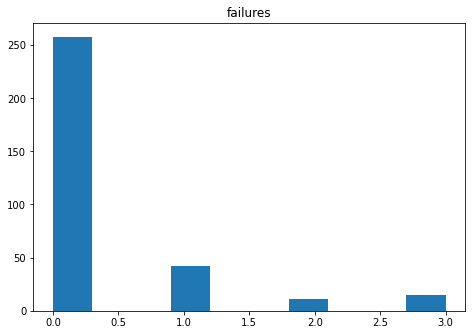

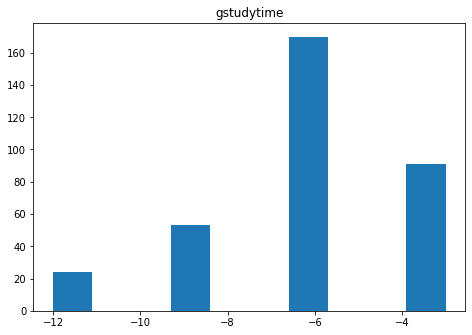

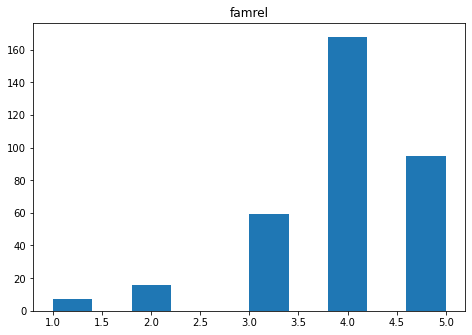

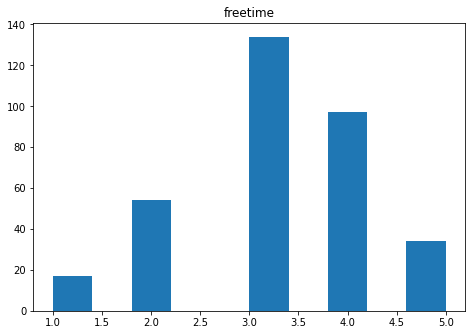

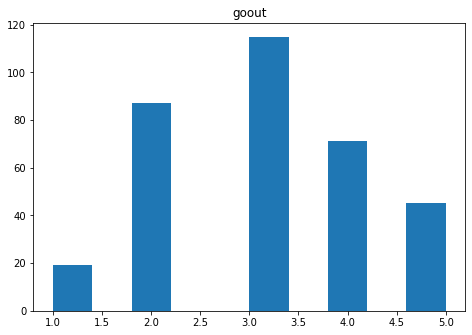

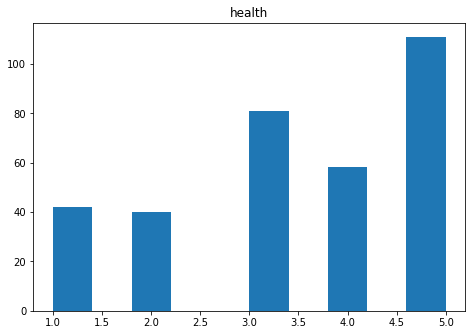

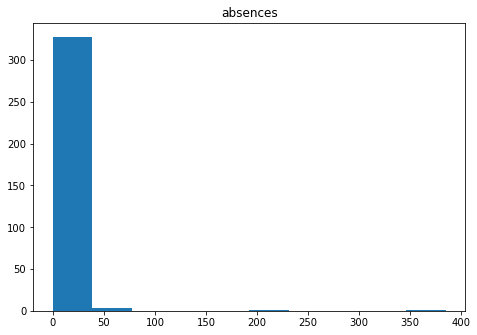

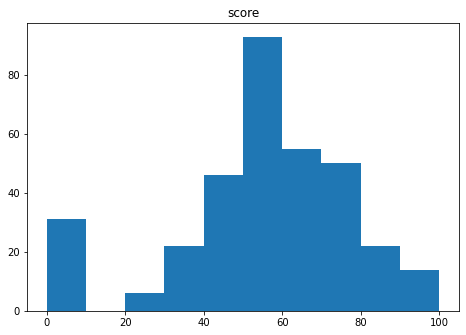

In [510]:
# проверяем данные
get_hists(math)

In [511]:
# absences не получится почистить по условиям, поэтому применияем clean_data
x = ['absences']  # список серий, к которым применяем функцию
clean_data(math, x)

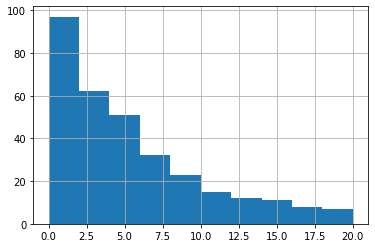

In [512]:
math['absences'].hist()  # получаем 'чистую' выборку

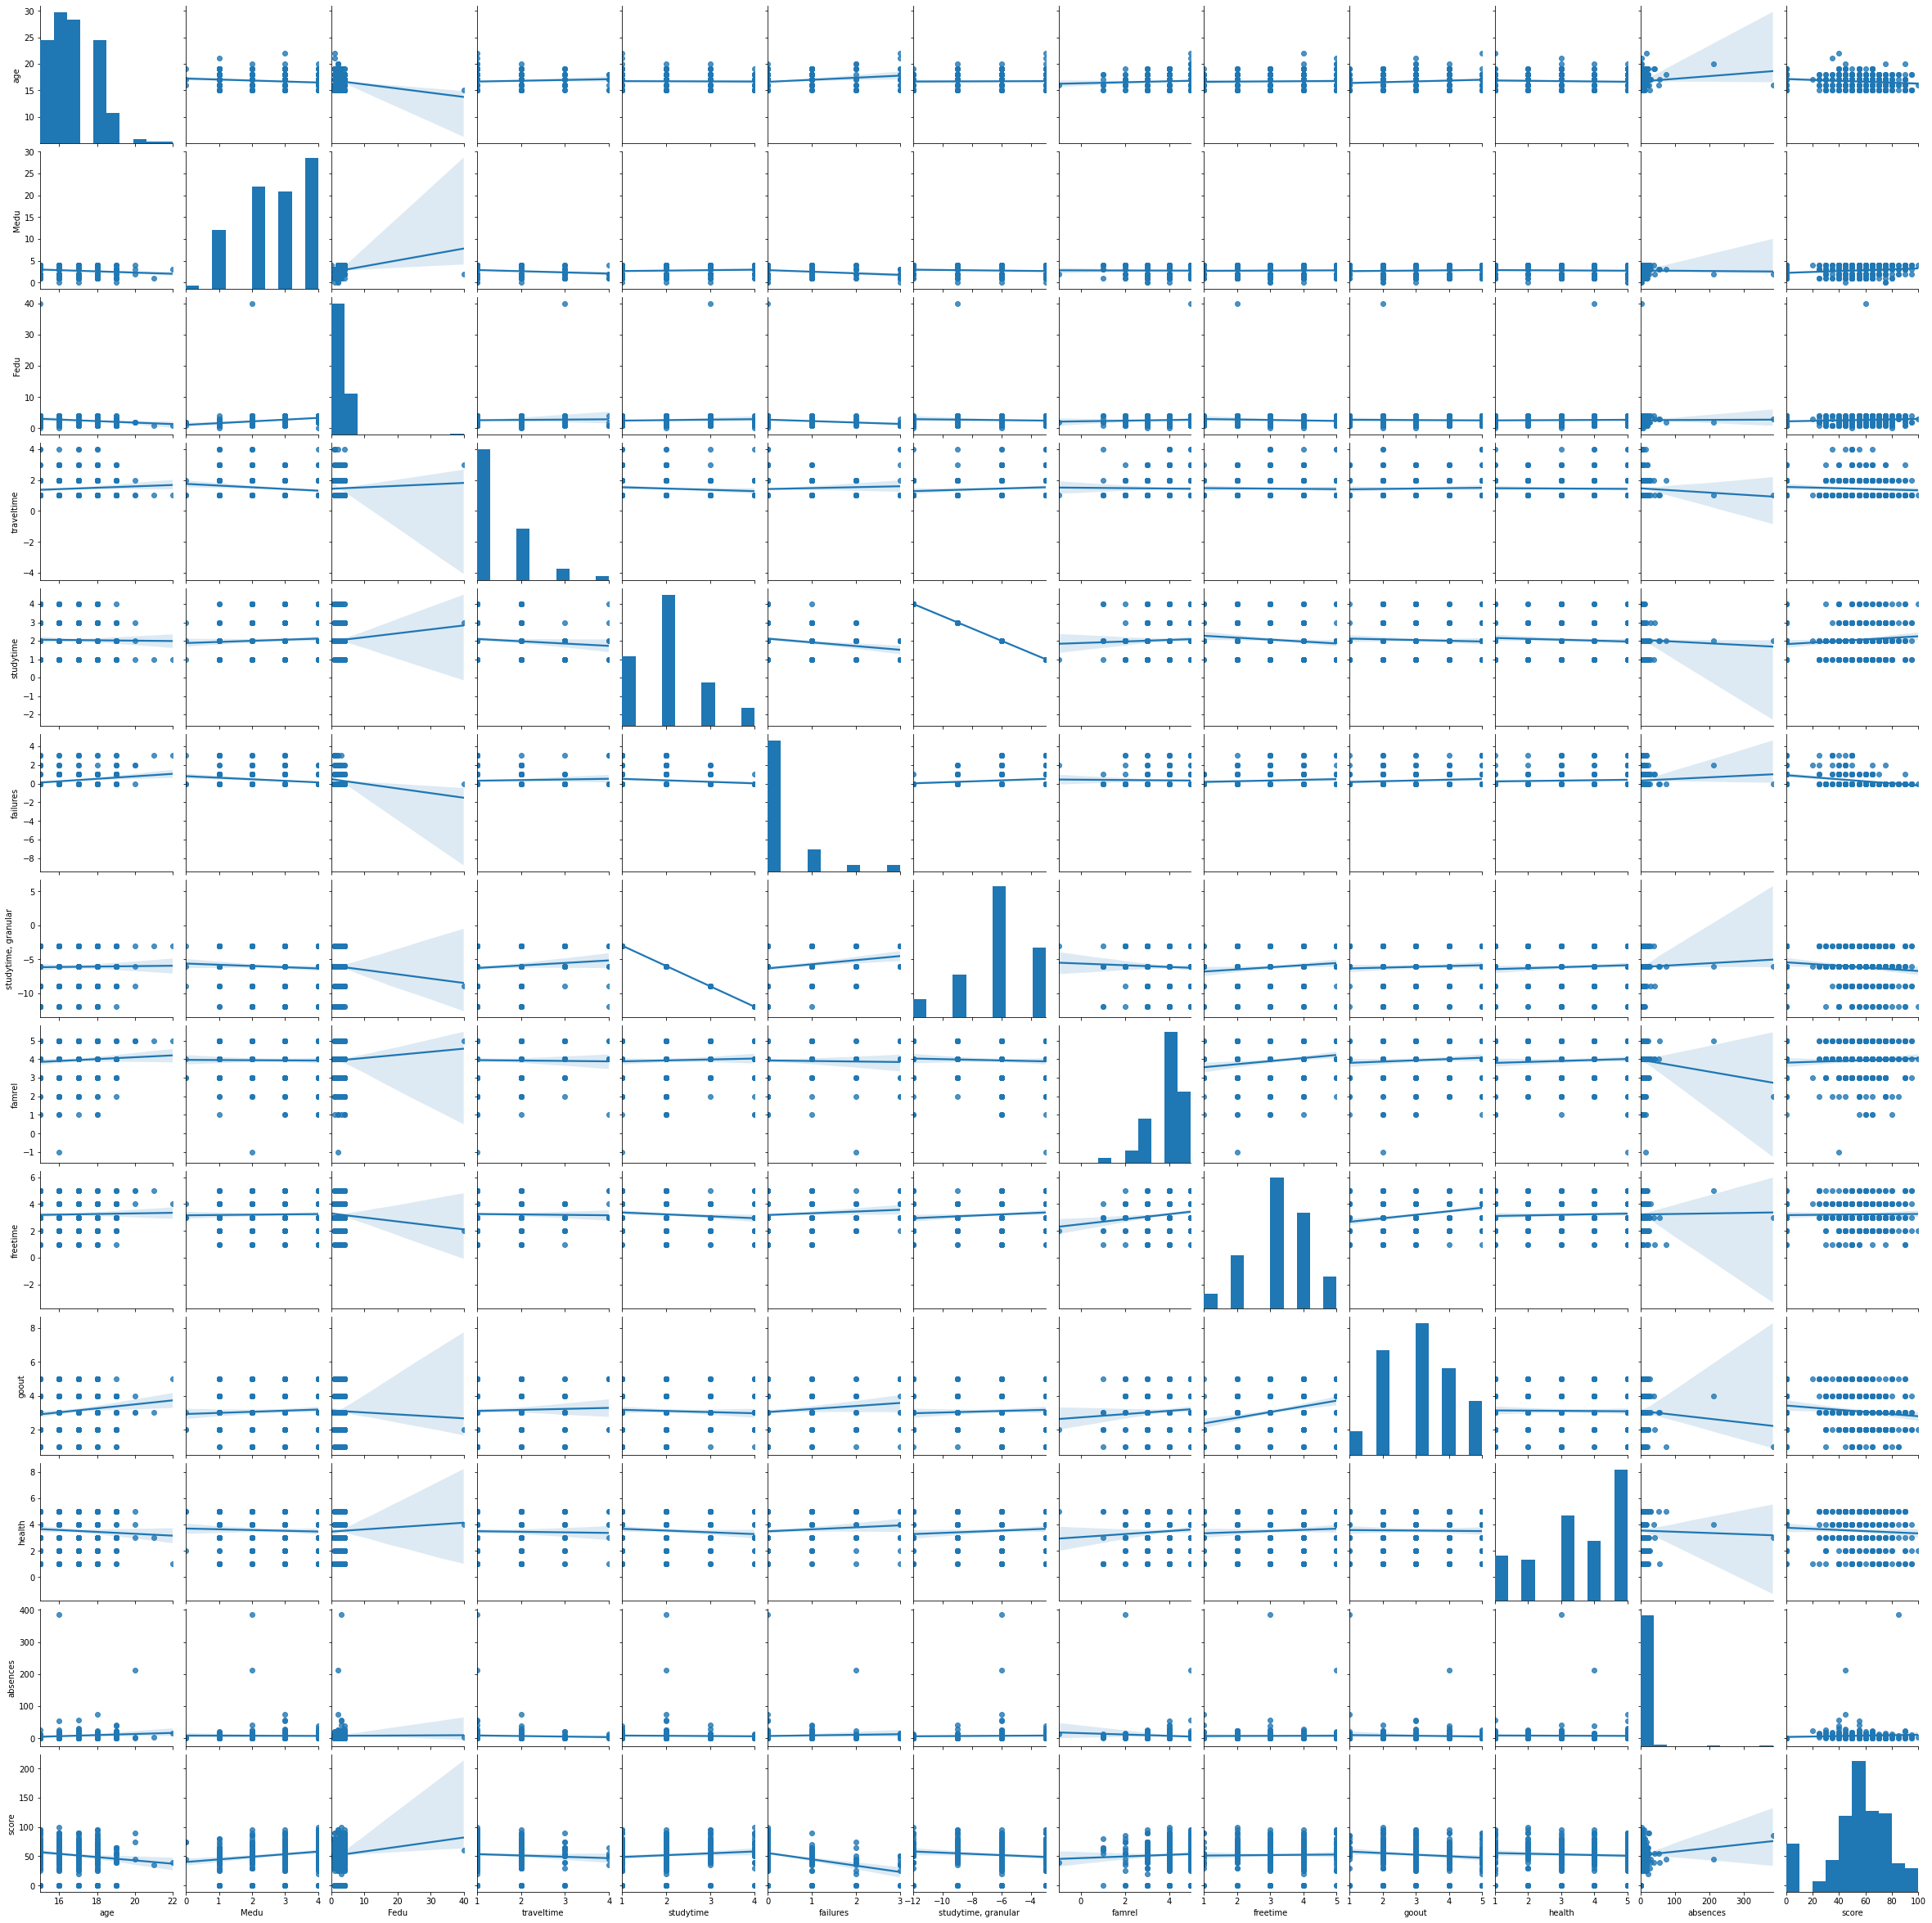

In [513]:
# строим все пары количественных характеристик, смотрим корреляцию
sns.pairplot(cacao, kind='reg')

In [514]:

#  по pairplot делаем вывод, что критерии studytime & health имеют некоторую степень корреляции

In [515]:
math.corr()

,age,meduc,feduc,travelt,studyt,failures,gstudytime,famrel,freetime,goout,health,absences,score
age,1.000000,-0.155335,-0.168980,0.066752,-0.033474,0.255513,0.033474,0.063349,0.021524,0.107076,-0.062275,0.138921,-0.148832
meduc,-0.155335,1.000000,0.642674,-0.166971,0.092661,-0.237919,-0.092661,-0.024829,0.007366,0.072158,-0.073154,0.102861,0.205382
feduc,-0.168980,0.642674,1.000000,-0.189226,0.012119,-0.264906,-0.012119,-0.035788,-0.027291,0.024714,0.010998,-0.009144,0.132420
travelt,0.066752,-0.166971,-0.189226,1.000000,-0.115118,0.061574,0.115118,-0.045855,-0.000118,0.015826,-0.034275,-0.053176,-0.062583
studyt,-0.033474,0.092661,0.012119,-0.115118,1.000000,-0.150694,-1.000000,0.029336,-0.126143,-0.064398,-0.086337,-0.069378,0.120601
failures,0.255513,-0.237919,-0.264906,0.061574,-0.150694,1.000000,0.150694,0.009199,0.113254,0.123837,0.067665,0.059202,-0.331450
gstudytime,0.033474,-0.092661,-0.012119,0.115118,-1.000000,0.150694,1.000000,-0.029336,0.126143,0.064398,0.086337,0.069378,-0.120601
famrel,0.063349,-0.024829,-0.035788,-0.045855,0.029336,0.009199,-0.029336,1.000000,0.167233,0.075583,0.101361,-0.061762,0.040078
freetime,0.021524,0.007366,-0.027291,-0.000118,-0.126143,0.113254,0.126143,0.167233,1.000000,0.283055,0.104436,0.100271,0.021726
goout,0.107076,0.072158,0.024714,0.015826,-0.064398,0.123837,0.064398,0.075583,0.283055,1.000000,-0.023786,0.061950,-0.137584


In [516]:
# внутри числовых данных явной корреляции не наблюдается
# 0.2 корреляция с уровнем образования матери
# -0.33 корреляция с количеством внеучебных неудач
# gstudytime и studytime имеют -1 корреляцию, можем оставить 1 из признаков ( studyt)

In [517]:
# при построении боксплот была замечена ошибка в famrel - имеются отрицательные значения признака, что противоречти условиям
math = math.loc[math.famrel >= 1]

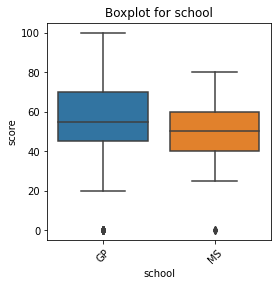

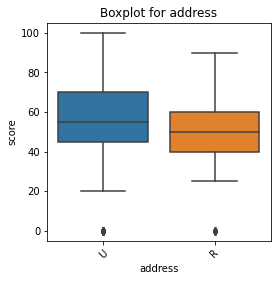

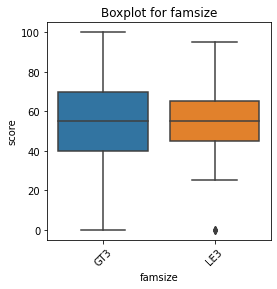

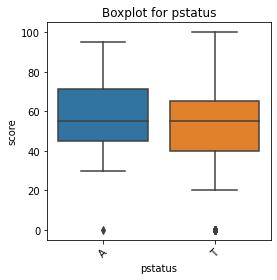

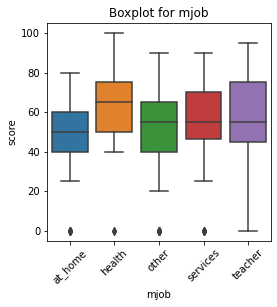

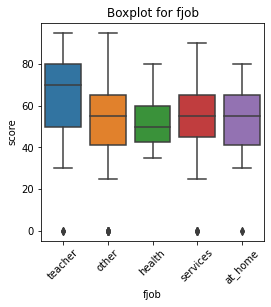

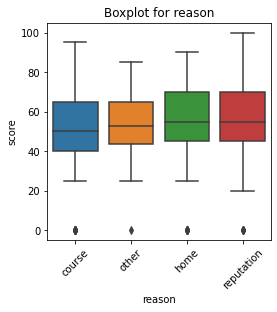

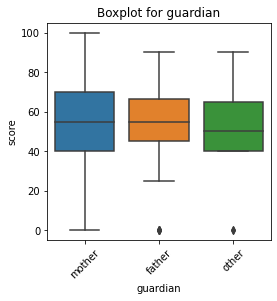

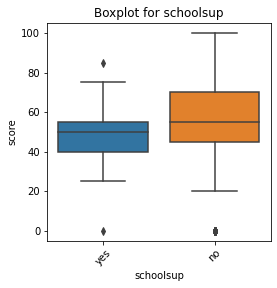

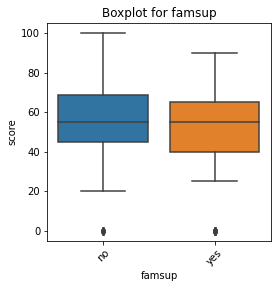

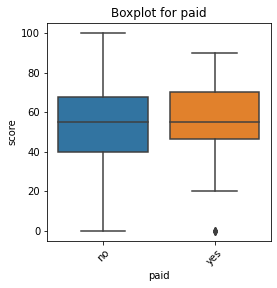

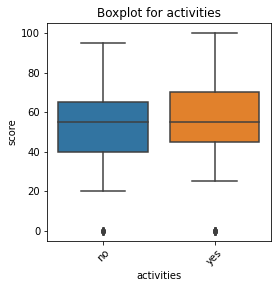

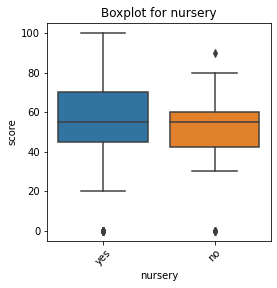

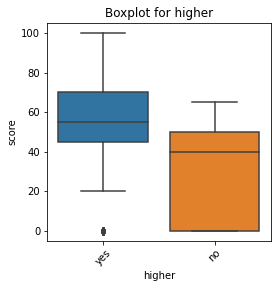

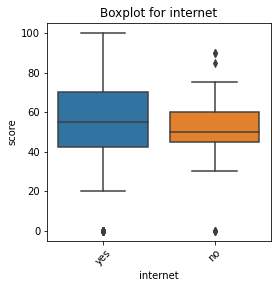

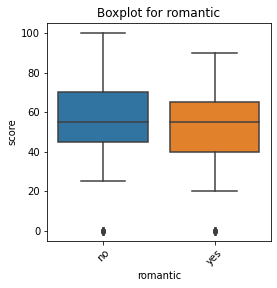

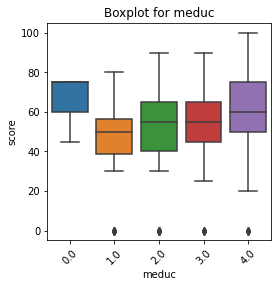

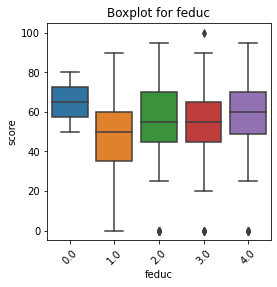

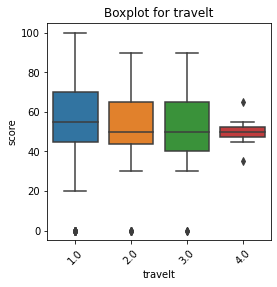

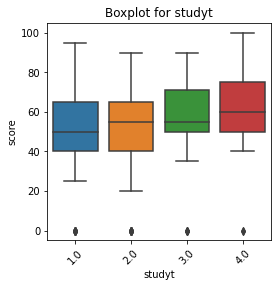

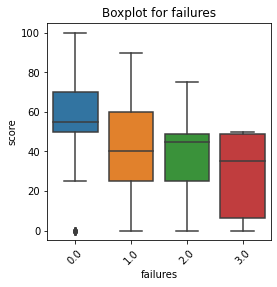

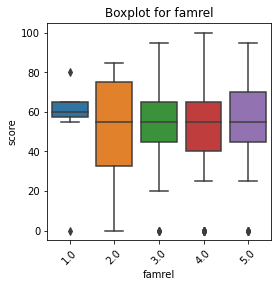

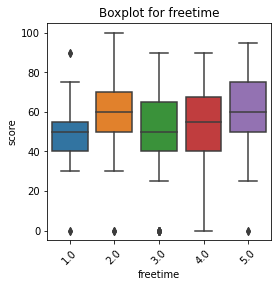

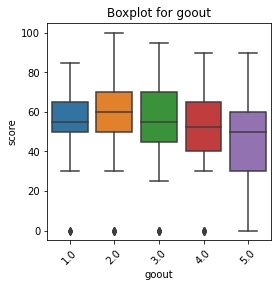

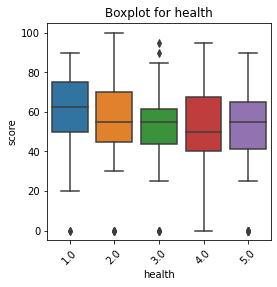

In [518]:
for col in ['school', 'address', 'famsize', 'pstatus','mjob', 'fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','meduc','feduc','travelt','studyt','failures','famrel','freetime','goout','health']:
    get_boxplot(col)
# строим боксплоты для нечисловых значений

In [519]:
#тест стьюдента проводим и для условно числовых значений, которые отображают только к какой категории относятся данные
for col in ['school', 'address', 'famsize', 'pstatus','mjob', 'fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','meduc','feduc','travelt','studyt','failures','famrel','freetime','goout','health','studyt','health']:
    get_stat_dif(math, col)


Найдены статистически значимые различия для колонки mjob


In [520]:
# подтвердилась значимость mjob для score

In [521]:
# не смотря на то что тест Стьдента подтвердил значимость только mjob по итогу EDA мы оставим также:
# meduc, failures - имеют наивысшие корреляции с признаком score (0.21 , -0.34  соответственно)
# addres, mjob, schoolsup, higher, meduc, feduc, studyt - по боксплот корреляция есть, пусть и не критичная
#  по pairplot делаем вывод, что критерии studytime & health имеют некоторую степень корреляции
math.head(1)

,school,sex,age,address,famsize,pstatus,meduc,feduc,mjob,fjob,reason,guardian,travelt,studyt,failures,schoolsup,famsup,paid,activities,nursery,gstudytime,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0


In [527]:
# чистим дф, оставляя только важные и не дублирующиеся признаки:
math_for_ml = math.loc[:, ['failures','address','mjob','schoolsup','higher','meduc','feduc','studyt','score']]

In [528]:
math_for_ml.head(5)

,failures,address,mjob,schoolsup,higher,meduc,feduc,studyt,score
0,0.0,U,at_home,yes,yes,4.0,4.0,2.0,30.0
1,0.0,U,at_home,no,yes,1.0,1.0,2.0,30.0
2,3.0,U,at_home,yes,yes,1.0,1.0,2.0,50.0
3,0.0,U,health,no,yes,4.0,2.0,3.0,75.0
4,0.0,U,other,no,yes,3.0,3.0,2.0,50.0


In [ ]:
# выводы
# выбросы есть почти во всех столбцах, но их количество незначительно. чистить датасет от этих пропусков не имеет смысла
# высокий уровень корреляции между studyt & gstudyt позволяет убрать один из них как дублирующий
#


# самыми важными исходя из нашей работы являются параметры meduc & failures
# также важными, но с меньшей степенью корреляции параметры :  addres, mjob, schoolsup, higher, meduc, feduc, studtime, failures
